<a href="https://colab.research.google.com/github/shubham62025865/shubham1/blob/main/Lecture_7_Missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Missing Values

<img width="700" src="https://www.displayr.com/wp-content/uploads/2018/04/How-to-Deal-with-Missing-Values-in-Cluster-Analysis.png" />


Missing values are common when working with real-world datasets – not the cleaned ones available on Kaggle, for example.

Missing data could result from a human factor (for example, a person deliberately failing to respond to a survey question), a problem in electrical sensors, or other factors. And when this happens, you can lose significant information.

Now, there is no perfect way to handle missing values that will give you an accurate result as to what the missing value is. But there are several techniques that you can leverage that will give you decent performance.

## How to treat missing values

- Remove them
- Imputation
    - univariate
      - numerical :- replace by mean/median/mode/ arbitary value
      - Categorical :- replace by mode/ any string "nil"
    - multivariate :- KNN imputer

## Remove values
Pros:

A model trained with the removal of all missing values creates a robust model.

Cons:

Loss of a lot of information.
Works poorly if the percentage of missing values is excessive in comparison to the complete dataset.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

dataset link - https://www.kaggle.com/competitions/home-data-for-ml-course/data?select=train.csv

In [ ]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1460, 81)

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
null_col_series = df.isnull().sum()

In [ ]:
type(null_col_series)

pandas.core.series.Series

In [ ]:
df.isnull().sum()[df.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
a = pd.Series([1,2,3,4,5])
a[a>3]

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [ ]:
null_col_series

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
null_col_series[null_col_series > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
null_col_series[null_col_series > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
len(df.isnull().sum() != 0)

81

In [ ]:
df.isnull().sum()[df.isnull().sum() != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
df.isnull().sum()[df.isnull().sum() != 0 ]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
[df.isnull().sum() != 0].sort_values(ascending = False)

<ipython-input-11-afe543e51d03>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.isnull().sum() != 0].sort_values(ascending = False)


IndexingError: ignored

In [ ]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
# (obtained marks / total marks) * 100

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False) / len(df) * 100

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [ ]:
# true, false

In [ ]:
df.isnull().mean()[df.isnull().mean()!= 0].sort_values(ascending = False) * 100

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [ ]:
(df.isnull().sum()[df.isnull().sum()!=0].sort_values(ascending = False) * 100) / len(df)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [ ]:
null_col = df.isnull().sum()[df.isnull().sum()!=0]

In [ ]:
null_col.index

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [ ]:
df[null_col.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

In [ ]:
df[null_col.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

In [ ]:
null_col = df.isnull().sum()[df.isnull().sum()!=0].index
null_col

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [ ]:
df[null_col]

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


In [ ]:
df[null_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

In [ ]:
df[null_col].select_dtypes(include = "object")

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,NaN,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN
1,NaN,None,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
2,NaN,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
3,NaN,None,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,NaN,NaN,NaN
4,NaN,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,None,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
1456,NaN,Stone,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,Unf,TA,TA,NaN,MnPrv,NaN
1457,NaN,None,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,RFn,TA,TA,NaN,GdPrv,Shed
1458,NaN,None,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,Unf,TA,TA,NaN,NaN,NaN


In [ ]:
df[null_col].select_dtypes(include = ["number"])

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# seperate target column
X = df.drop(columns = ["SalePrice", "Id"])
y = df["SalePrice"]
df.shape,X.shape, y.shape

((1460, 81), (1460, 79), (1460,))

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df["SaleType"].dtype

dtype('O')

In [ ]:
X["Id"].dtype

dtype('int64')

In [ ]:
num_col = []
cat_col = []
for col in X.columns:
  if X[col].dtype != "object":
    num_col.append(col)
  else:
    cat_col.append(col)

In [ ]:
[col for col in X.columns if X[col].dtype != "object"]

In [ ]:
# Seperating numerical and categorical columns
num_col = [col for col in X.columns if X[col].dtype !=object]
cat_col = [col for col in X.columns if X[col].dtype ==object]
# num_col, cat_col

In [ ]:
num_col

In [ ]:
X_num_df = X.select_dtypes(exclude=['object'])
X_num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [ ]:
X[cat_col]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
X[num_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

# Train test split
<img width = 500 src = https://i.ytimg.com/vi/xgDs0scjuuQ/maxresdefault.jpg />


<img width = 500 src = https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_train-test-split_0.jpg />

Before specifying random state

<img width = 500 src = https://limitlessdatascience.files.wordpress.com/2019/08/image-48.png />


After specifying random state

<img width = 500 src = https://limitlessdatascience.files.wordpress.com/2019/08/random_state.png />


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[num_col], y, test_size = 0.2,random_state = 3)

print(f'Shape of X_train -: {X_train.shape}')
print(f'Shape of X_test -: {X_test.shape}')
print(f'Shape of y_train -: {y_train.shape}')
print(f'Shape of y_test -: {y_test.shape}')

Shape of X_train -: (1168, 36)
Shape of X_test -: (292, 36)
Shape of y_train -: (1168,)
Shape of y_test -: (292,)


In [ ]:
df.shape

(1460, 81)

In [ ]:
X_train.isnull().sum()[X_train.isnull().sum() > 0] * 100 / len(X_train)

LotFrontage    18.321918
MasVnrArea      0.513699
GarageYrBlt     5.222603
dtype: float64

In [ ]:
X_test.isnull().sum()[X_test.isnull().sum() > 0] * 100 / len(X_test)

LotFrontage    15.410959
MasVnrArea      0.684932
GarageYrBlt     6.849315
dtype: float64

In [ ]:
X_test.isnull().sum() > 0

In [ ]:
X_test.isnull().sum()[X_test.isnull().sum() > 0]

LotFrontage    45
MasVnrArea      2
GarageYrBlt    20
dtype: int64

In [ ]:
X_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
140,141,20,70.0,10500,4,5,1971,1971,0.0,432,...,0,0,0,0,0,0,0,0,4,2010
950,951,20,60.0,7200,5,8,1950,2002,0.0,398,...,720,194,0,0,0,0,0,0,7,2007
248,249,60,72.0,11317,7,5,2003,2003,101.0,0,...,500,144,68,0,0,0,0,0,9,2007
1360,1361,70,51.0,9842,5,6,1921,1998,0.0,0,...,621,183,0,301,0,0,0,0,5,2008
568,569,50,79.0,12327,8,8,1983,2009,0.0,1441,...,612,349,40,0,0,0,0,0,9,2009


In [ ]:
X_train_drop_col = X_train.drop(columns = ["LotFrontage", "MasVnrArea", "GarageYrBlt"])
X_test_drop_col = X_test.drop(columns = ["LotFrontage", "MasVnrArea", "GarageYrBlt"])

In [ ]:
X_train_drop_col

(1168, 33)

In [ ]:
# Number of missing values in each column of training data
X_train.isnull().mean()[X_train.isnull().mean()!= 0].sort_values(ascending = False) * 100

LotFrontage    18.150685
GarageYrBlt     4.965753
MasVnrArea      0.513699
dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
def score(X_train, X_test, y_train, y_test):
  model = RandomForestRegressor(random_state = 3)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  error = mean_absolute_error(y_test, y_pred)
  return error

<img width = 500 src= https://i.imgur.com/19LNbyQ.jpg />

In [ ]:
d = {'Process': [], 'MAE': []}
mae_df = pd.DataFrame(data = d)
mae_df

,Process,MAE


In [ ]:
d = {"Process" : ["Drop columns with missing values"],
      "MAE" : [round(score(X_train_drop_col, X_test_drop_col, y_train, y_test),2)]}
temp_df = pd.DataFrame(data = d)
mae_df = pd.concat([mae_df, temp_df])
mae_df

,Process,MAE
0,Drop columns with missing values,17387.75


In [ ]:
# Remove rows
X_train.isnull().sum()[X_train.isnull().sum()> 0]

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [ ]:
X_train_drop_row = X_train.dropna()
X_test_drop_row = X_test.dropna()

In [ ]:
X_train_drop_row.index

In [ ]:
y_train.loc[X_train_drop_row.index]

727     194500
958     185000
1102    135000
312     119900
565     128000
         ...  
659     167000
1021    194000
256     207500
952     133900
1273    177000
Name: SalePrice, Length: 895, dtype: int64

In [ ]:
y_train_row = y_train.loc[X_train_drop_row.index]
y_test_row = y_test.loc[X_test_drop_row.index]

In [ ]:
X_train_drop_row.shape, X_test_drop_row.shape, y_train_row.shape, y_test_row.shape

((895, 36), (226, 36), (895,), (226,))

In [ ]:
d = {"Process" : ["Drop rows with missing values"],
      "MAE" : [round(score(X_train_drop_row, X_test_drop_row, y_train_row, y_test_row),2)]}
temp_df = pd.DataFrame(data = d)
mae_df = pd.concat([mae_df, temp_df])
mae_df

,Process,MAE
0,Drop columns with missing values,17387.75
0,Drop rows with missing values,17931.65


In [ ]:
def first(x,y):
  c = x+y
  return c

In [ ]:
a = 5
b = 6
z = first(a,b)
z

In [ ]:
X_train.shape

## Impute missing values with Mean/Median:
Columns in the dataset which are having numeric continuous values can be replaced with the mean, median, or mode of remaining values in the column. This method can prevent the loss of data compared to the earlier method. Replacing the above two approximations (mean, median) is a statistical approach to handle the missing values.

Pros:

- Prevent data loss which results in deletion of rows or columns
- Works well with a small dataset and is easy to implement.

Cons:

- Works only with numerical continuous variables.
- Can cause data leakage
- Do not factor the covariance between features.

In [ ]:
# imputations through pandas
X_train.isnull().mean()[X_train.isnull().mean() > 0]

LotFrontage    0.183219
MasVnrArea     0.005137
GarageYrBlt    0.052226
dtype: float64

In [ ]:
X_train["LotFrontage"].mean(), X_train["LotFrontage"].median()

(69.97274633123689, 69.5)

In [ ]:
mean_LotFrontage = X_train["LotFrontage"].mean()
mean_LotFrontage

69.97274633123689

In [ ]:
df["LotFrontage"].fillna(mean_LotFrontage)

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [ ]:
# df["mean_Lot"] = df["LotFrontage"].fillna(mean_LotFrontage)

In [ ]:
X_train_temp = X_train.copy()
X_train_temp["mean_LotFrontage"] = X_train_temp["LotFrontage"].fillna(mean_LotFrontage)
X_train_temp.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,mean_LotFrontage
727,728,20,64.0,7314,7,5,2007,2007,82.0,724,...,132,0,0,0,0,0,0,2,2009,64.000000
328,329,75,NaN,11888,6,6,1916,1994,0.0,0,...,0,60,268,0,0,0,0,7,2009,69.972746
958,959,20,65.0,8450,7,5,2003,2003,0.0,699,...,0,39,0,0,0,0,0,10,2007,65.000000
126,127,120,NaN,4928,6,5,1976,1976,0.0,120,...,0,205,0,0,0,0,0,2,2007,69.972746
1102,1103,20,70.0,7000,5,7,1960,2002,45.0,588,...,0,16,0,0,0,0,0,4,2007,70.000000


In [ ]:
X_train_temp.isnull().sum()

Id                    0
MSSubClass            0
LotFrontage         214
LotArea               0
OverallQual           0
OverallCond           0
YearBuilt             0
YearRemodAdd          0
MasVnrArea            6
BsmtFinSF1            0
BsmtFinSF2            0
BsmtUnfSF             0
TotalBsmtSF           0
1stFlrSF              0
2ndFlrSF              0
LowQualFinSF          0
GrLivArea             0
BsmtFullBath          0
BsmtHalfBath          0
FullBath              0
HalfBath              0
BedroomAbvGr          0
KitchenAbvGr          0
TotRmsAbvGrd          0
Fireplaces            0
GarageYrBlt          61
GarageCars            0
GarageArea            0
WoodDeckSF            0
OpenPorchSF           0
EnclosedPorch         0
3SsnPorch             0
ScreenPorch           0
PoolArea              0
MiscVal               0
MoSold                0
YrSold                0
mean_LotFrontage      0
dtype: int64

In [ ]:
mean_LotFrontage = X_train["LotFrontage"].mean() 
median_LotFrontage = X_train["LotFrontage"].median() 

mean_MasVnrArea = X_train["MasVnrArea"].mean() 
median_MasVnrArea = X_train["MasVnrArea"].median()

mean_GarageYrBlt = X_train["GarageYrBlt"].mean() 
median_GarageYrBlt = X_train["GarageYrBlt"].median()

X_train_temp = X_train.copy()

X_train_temp["mean_LotFrontage"] = X_train_temp["LotFrontage"].fillna(mean_LotFrontage)
X_train_temp["median_LotFrontage"] = X_train_temp["LotFrontage"].fillna(median_LotFrontage)

X_train_temp["mean_MasVnrArea"] = X_train_temp["MasVnrArea"].fillna(mean_MasVnrArea)
X_train_temp["median_MasVnrArea"] = X_train_temp["MasVnrArea"].fillna(median_MasVnrArea)

X_train_temp["mean_GarageYrBlt"] = X_train_temp["GarageYrBlt"].fillna(mean_GarageYrBlt)
X_train_temp["median_GarageYrBlt"] = X_train_temp["GarageYrBlt"].fillna(median_GarageYrBlt)



3 things to consider after imputations
- 1. compare the variance of original column vs imputed column
- 2. check correlation with other columns.
- 3. check boxplots 

<img width = 500 src= https://i.ytimg.com/vi/deIQeQzPK08/maxresdefault.jpg />

variance measures how far each number in the set is from the mean (average),

In [ ]:
print(f'variance of original LotFrontage -: {X_train_temp["LotFrontage"].var()}')
print(f'variance of mean_LotFrontage -: {X_train_temp["mean_LotFrontage"].var()}')
print(f'variance of median_LotFrontage -: {X_train_temp["median_LotFrontage"].var()}')

print(f'variance of original MasVnrArea -: {X_train_temp["MasVnrArea"].var()}')
print(f'variance of mean_MasVnrArea -: {X_train_temp["mean_MasVnrArea"].var()}')
print(f'variance of median_MasVnrArea -: {X_train_temp["median_MasVnrArea"].var()}')

print(f'variance of original GarageYrBlt -: {X_train_temp["GarageYrBlt"].var()}')
print(f'variance of mean_GarageYrBlt -: {X_train_temp["mean_GarageYrBlt"].var()}')
print(f'variance of median_GarageYrBlt -: {X_train_temp["median_GarageYrBlt"].var()}')


variance of original LotFrontage -: 556.616255408827
variance of mean_LotFrontage -: 454.5460937485965
variance of median_LotFrontage -: 454.5795675306076
variance of original MasVnrArea -: 33147.16872065597
variance of mean_MasVnrArea -: 32976.74625936725
variance of median_MasVnrArea -: 33034.18455001115
variance of original GarageYrBlt -: 615.2210771173413
variance of mean_GarageYrBlt -: 583.0629916810451
variance of median_GarageYrBlt -: 583.1838449777558


In [ ]:
2563*10/100

256.3

In [ ]:
col_name = "GarageYrBlt"
mean_col_name = "mean_" + col_name
mean_col_name

'mean_GarageYrBlt'

In [ ]:
import matplotlib.pyplot as plt

def density_plot(df,col_name):
  
  fig = plt.figure(figsize=(8,6))
  mean_col_name = "mean_" + col_name
  median_col_name = "median_" + col_name

  sns.distplot(df[col_name], hist = False)
  sns.distplot(df[mean_col_name], hist = False)
  sns.distplot(df[median_col_name], hist = False)
  fig.legend(labels=[col_name,mean_col_name,median_col_name])
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

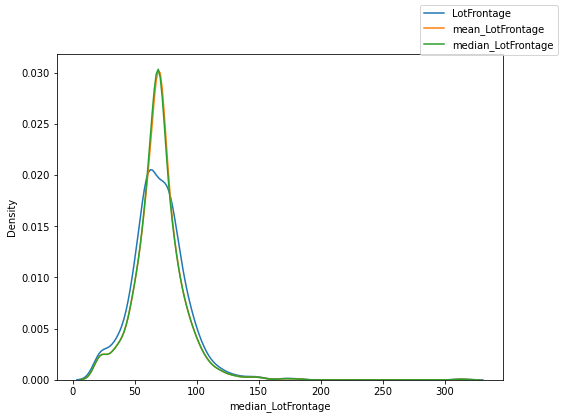

In [ ]:
density_plot(X_train_temp,"LotFrontage")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

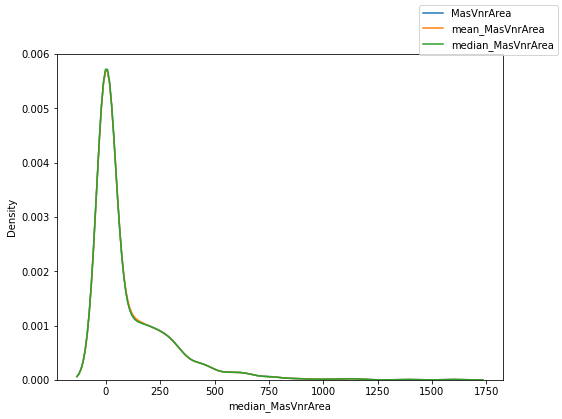

In [ ]:
density_plot(X_train_temp,"MasVnrArea")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

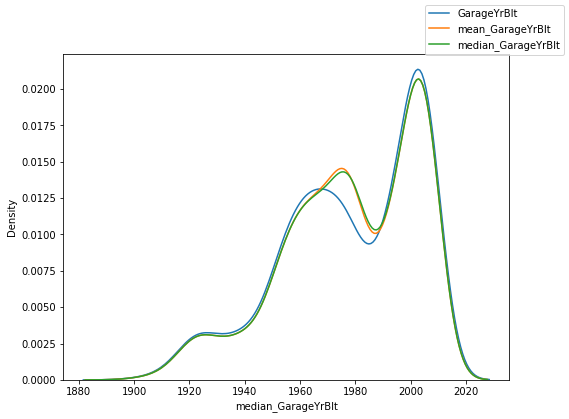

In [ ]:
density_plot(X_train_temp,"GarageYrBlt")

In [ ]:
X_train_temp.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'mean_LotFrontage', 'median_LotFrontage',
       'mean_MasVnrArea', 'median_MasVnrArea', 'mean_GarageYrBlt',
       'median_GarageYrBlt'],
      dtype='object')

In [ ]:
col = ['MSSubClass', 'LotFrontage', 'mean_LotFrontage', 'median_LotFrontage',
       'MasVnrArea','mean_MasVnrArea', 'median_MasVnrArea',
        'GarageYrBlt','mean_GarageYrBlt','median_GarageYrBlt','LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd',  'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']

In [ ]:
# .var() - variance
# .cov() - covariance
# .corr() - correlation

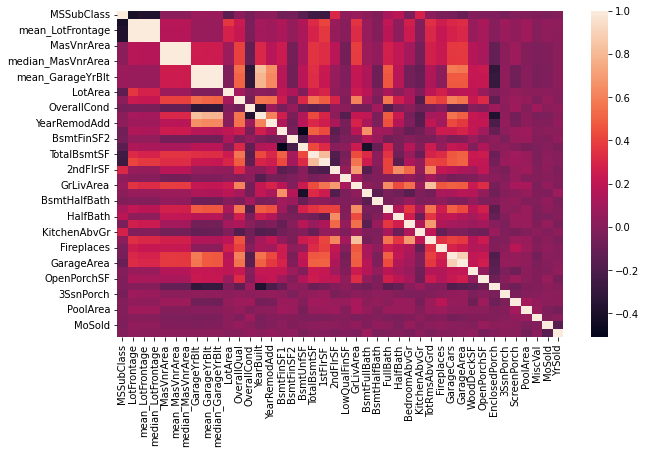

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
sns.heatmap(X_train_temp[col].corr())
plt.show()

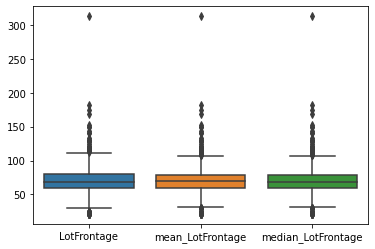

In [ ]:
sns.boxplot(data=X_train_temp[["LotFrontage", "mean_LotFrontage","median_LotFrontage"]], orient="v")

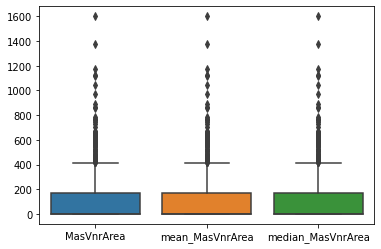

In [ ]:
sns.boxplot(data=X_train_temp[['MasVnrArea','mean_MasVnrArea', 'median_MasVnrArea']], orient="v")

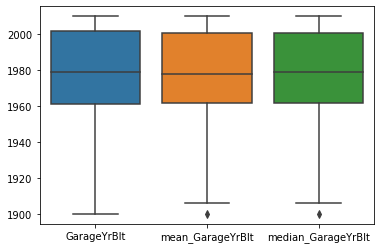

In [ ]:
sns.boxplot(data=X_train_temp[['GarageYrBlt','mean_GarageYrBlt','median_GarageYrBlt']], orient="v")

In [ ]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
618,619,20,90.0,11694,9,5,2007,2007,452.0,48,...,774,0,108,0,0,260,0,0,7,2007
870,871,20,60.0,6600,5,5,1962,1962,0.0,0,...,308,0,0,0,0,0,0,0,8,2009
92,93,30,80.0,13360,5,7,1921,2006,0.0,713,...,432,0,0,44,0,0,0,0,8,2009
817,818,20,NaN,13265,8,5,2002,2002,148.0,1218,...,857,150,59,0,0,0,0,0,7,2008
302,303,20,118.0,13704,7,5,2001,2002,150.0,0,...,843,468,81,0,0,0,0,0,1,2006


In [ ]:
from sklearn.impute import SimpleImputer

# imputation
mean_imputer = SimpleImputer(strategy="mean")

In [ ]:
mean_imputer.fit(X_train)

SimpleImputer()

In [ ]:
pd.DataFrame(mean_imputer.transform(X_train), columns = X_train.columns)
# mean_imputer.transform(X_test)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,728.0,20.0,64.000000,7314.0,7.0,5.0,2007.0,2007.0,82.0,724.0,...,632.0,132.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2009.0
1,329.0,75.0,69.972746,11888.0,6.0,6.0,1916.0,1994.0,0.0,0.0,...,441.0,0.0,60.0,268.0,0.0,0.0,0.0,0.0,7.0,2009.0
2,959.0,20.0,65.000000,8450.0,7.0,5.0,2003.0,2003.0,0.0,699.0,...,531.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,10.0,2007.0
3,127.0,120.0,69.972746,4928.0,6.0,5.0,1976.0,1976.0,0.0,120.0,...,440.0,0.0,205.0,0.0,0.0,0.0,0.0,0.0,2.0,2007.0
4,1103.0,20.0,70.000000,7000.0,5.0,7.0,1960.0,2002.0,45.0,588.0,...,254.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,4.0,2007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,790.0,60.0,69.972746,12205.0,6.0,8.0,1966.0,2007.0,157.0,568.0,...,444.0,133.0,168.0,0.0,0.0,0.0,0.0,0.0,7.0,2007.0
1164,257.0,60.0,64.000000,8791.0,6.0,5.0,2003.0,2003.0,0.0,503.0,...,673.0,216.0,56.0,0.0,0.0,0.0,0.0,0.0,5.0,2008.0
1165,969.0,50.0,50.000000,5925.0,3.0,6.0,1910.0,1950.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2009.0
1166,953.0,85.0,60.000000,7200.0,5.0,8.0,1972.0,2003.0,0.0,660.0,...,396.0,192.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2009.0


In [ ]:
from sklearn.impute import SimpleImputer

# imputation
mean_imputer = SimpleImputer(strategy="mean")
imputed_X_train = pd.DataFrame(mean_imputer.fit_transform(X_train), columns = X_train.columns)
imputed_X_test = pd.DataFrame(mean_imputer.transform(X_test), columns = X_test.columns)
imputed_X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20.0,64.000000,7314.0,7.0,5.0,2007.0,2007.0,82.0,724.0,0.0,...,632.0,132.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2009.0
1,75.0,69.972746,11888.0,6.0,6.0,1916.0,1994.0,0.0,0.0,0.0,...,441.0,0.0,60.0,268.0,0.0,0.0,0.0,0.0,7.0,2009.0
2,20.0,65.000000,8450.0,7.0,5.0,2003.0,2003.0,0.0,699.0,0.0,...,531.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,10.0,2007.0
3,120.0,69.972746,4928.0,6.0,5.0,1976.0,1976.0,0.0,120.0,0.0,...,440.0,0.0,205.0,0.0,0.0,0.0,0.0,0.0,2.0,2007.0
4,20.0,70.000000,7000.0,5.0,7.0,1960.0,2002.0,45.0,588.0,0.0,...,254.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,4.0,2007.0


In [ ]:
from sklearn.impute import SimpleImputer

# imputation
mean_imputer = SimpleImputer(strategy="mean")
imputed_X_train = pd.DataFrame(mean_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(mean_imputer.transform(X_valid))

# imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns


In [ ]:
d = {'Process': ["Mean Imputation"],
     'MAE': [round(score(imputed_X_train, imputed_X_test, y_train, y_test),2)]}
temp_df = pd.DataFrame(data = d)
mae_df = pd.concat([mae_df,temp_df], ignore_index = True)
mae_df

,Process,MAE
0,Drop columns with missing values,17387.75
1,Drop rows with missing values,17931.65
2,Mean Imputation,17462.46


In [ ]:
# imputation
mean_imputer = SimpleImputer(strategy="median")
imputed_X_train = pd.DataFrame(mean_imputer.fit_transform(X_train))
imputed_X_test = pd.DataFrame(mean_imputer.transform(X_test))

# imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_test.columns = X_test.columns

d = {'Process': ["Median Imputation"],
     'MAE': [round(score(imputed_X_train, imputed_X_test, y_train, y_test),2)]}
temp_df = pd.DataFrame(data = d)
mae_df = pd.concat([mae_df,temp_df], ignore_index = True)
mae_df

,Process,MAE
0,Drop columns with missing values,17387.75
1,Drop rows with missing values,17931.65
2,Mean Imputation,17462.46
3,Median Imputation,17390.29


In [ ]:
# mean imputation with new column marking missing values

# Make copy to avoid changing original data (when imputing)
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

# get column names with missing values
cols_with_missing = X_train_plus.isnull().sum()[X_train_plus.isnull().sum() != 0].index
print(cols_with_missing)
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

X_train_plus.head()

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage_was_missing,MasVnrArea_was_missing,GarageYrBlt_was_missing
618,619,20,90.0,11694,9,5,2007,2007,452.0,48,...,0,0,260,0,0,7,2007,False,False,False
870,871,20,60.0,6600,5,5,1962,1962,0.0,0,...,0,0,0,0,0,8,2009,False,False,False
92,93,30,80.0,13360,5,7,1921,2006,0.0,713,...,44,0,0,0,0,8,2009,False,False,False
817,818,20,NaN,13265,8,5,2002,2002,148.0,1218,...,0,0,0,0,0,7,2008,True,False,False
302,303,20,118.0,13704,7,5,2001,2002,150.0,0,...,0,0,0,0,0,1,2006,False,False,False


In [ ]:
# mean imputation with new column marking missing values

# Make copy to avoid changing original data (when imputing)
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

# get column names with missing values
cols_with_missing = X_train_plus.isnull().sum()[X_train_plus.isnull().sum() != 0].index
print(cols_with_missing)
# Make new columns indicating what will be imputed
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

# Imputation
mean_imputer = SimpleImputer(strategy="mean")
imputed_X_train_plus = pd.DataFrame(mean_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(mean_imputer.transform(X_valid_plus))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

d = {'Process': ["Mean Imputation with missing value marking"],
     'MAE': [round(score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid),2)]}
temp_df = pd.DataFrame(data = d)
mae_df = pd.concat([mae_df,temp_df], ignore_index = True)
mae_df

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')


,Process,MAE
0,Drop columns with missing values,17952.59
1,Drop rows with missing values,17904.02
2,Mean Imputation,18250.61
3,Median Imputation,18103.60
4,Mean Imputation with missing value marking,18253.31


## Imputation method for categorical columns:
When missing values is from categorical columns (string or numerical) then the missing values can be replaced with the most frequent category. If the number of missing values is very large then it can be replaced with a new category.

Pros:

- Prevent data loss which results in deletion of rows or columns
- Works well with a small dataset and is easy to implement.
- Negates the loss of data by adding a unique category

Cons:

- Works only with categorical variables.
- Addition of new features to the model while encoding, which may result in poor performance

In [ ]:
cat_col

In [ ]:
df[num_col]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,500,349,0,0,0,0,0,0,2,2010
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,252,0,60,0,0,0,0,2500,5,2010
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,240,366,0,112,0,0,0,0,4,2010


In [ ]:
df[cat_col]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
df[cat_col].isnull().mean()[df[cat_col].isnull().mean() > 0].sort_values(ascending = False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [ ]:
df['FireplaceQu']

0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1460, dtype: object

In [ ]:
df['FireplaceQu'].value_counts(dropna = False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

<Axes: xlabel='FireplaceQu', ylabel='count'>

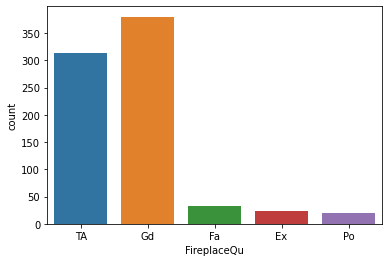

In [ ]:
sns.countplot(x = df['FireplaceQu'])

In [ ]:
df_cat = df[cat_col].copy()
df_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
df["FireplaceQu"].isnull().sum()

690

In [ ]:
df["FireplaceQu"] = df_cat["FireplaceQu"].fillna("missing")

<Axes: xlabel='FireplaceQu', ylabel='count'>

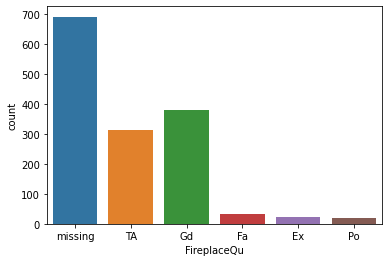

In [ ]:
sns.countplot(x = df["FireplaceQu"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


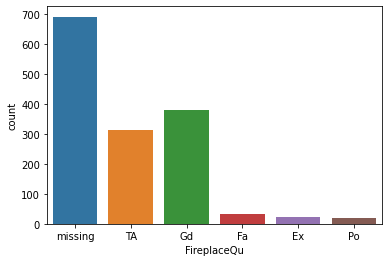

In [ ]:
df_cat["FireplaceQu"].fillna("missing", inplace = True)
sns.countplot(df_cat['FireplaceQu'])

<Axes: xlabel='GarageType', ylabel='count'>

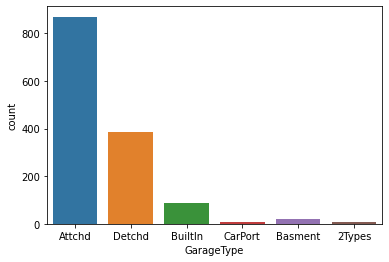

In [ ]:
sns.countplot(x = df["GarageType"])

<Axes: xlabel='GarageType', ylabel='count'>

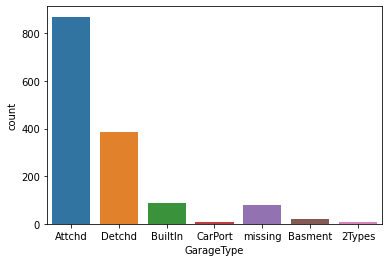

In [ ]:
df_cat["GarageType"].fillna("missing", inplace = True)
sns.countplot(x = df_cat['GarageType'])

In [ ]:
df["GarageType"].mode()

0    Attchd
dtype: object

<Axes: xlabel='GarageType', ylabel='count'>

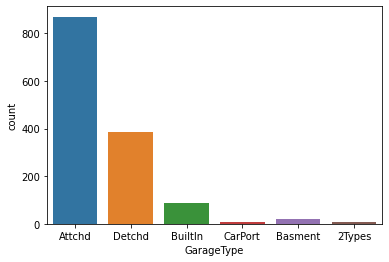

In [ ]:
df_cat = df[cat_col].copy()
df_cat["GarageType"].fillna(df["GarageType"].mode(), inplace = True)
sns.countplot(x = df["GarageType"])

In [ ]:
df_cat = df[cat_col].copy()
df_cat["GarageType"].fillna(df["GarageType"].mode(), inplace = True)
sns.countplot(df_cat['GarageType'])

In [ ]:
X = df[cat_col]
y = df["SalePrice"]
X.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
# train test split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8,
                                                      random_state=0)

In [ ]:
#  imputation
mode_imputer = SimpleImputer(strategy="most_frequent")
mode_imputer

SimpleImputer(strategy='most_frequent')

In [ ]:
X_train.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
pd.DataFrame(mode_imputer.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,New,Partial
1,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,PosN,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
4,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1164,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1165,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,RRAe,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1166,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,...,Attchd,Fin,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


In [ ]:
#  imputation
mode_imputer = SimpleImputer(strategy="most_frequent")
imputed_X_train = pd.DataFrame(mode_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(mode_imputer.transform(X_valid))

In [ ]:
X = df[cat_col]
y = df["SalePrice"]

# train test split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8,
                                                      random_state=0)
# imputation
mode_imputer = SimpleImputer(strategy="most_frequent")
imputed_X_train = pd.DataFrame(mode_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(mode_imputer.transform(X_valid))

# imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns


In [ ]:
imputed_X_train

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,New,Partial
1,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,PosN,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
4,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1164,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1165,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,RRAe,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1166,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,...,Attchd,Fin,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


In [ ]:
imputed_X_train.isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

# KNN imputer


One thing to note here is that the KNN Imputer does not recognize text data values. It will generate errors if we do not change these values to numerical values.

A good way to modify the text data is to perform one-hot encoding or create “dummy variables”. The idea is to convert each category into a binary data column by assigning a 1 or 0. Other options would be to use LabelEncoder or OrdinalEncoder from Scikit-Learn’s preprocessing package.


This imputer utilizes the k-Nearest Neighbors method to replace the missing values in the datasets with the mean value from the parameter ‘n_neighbors’ nearest neighbors found in the training set. By default, it uses a Euclidean distance metric to impute the missing values.

<img width = 500 src= https://i.stack.imgur.com/J5r01.png />


In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
# seperate target column
X = df.drop(columns = ["SalePrice"])
y = df["SalePrice"]
df.shape,X.shape, y.shape

((1460, 81), (1460, 80), (1460,))

In [ ]:
# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X[num_col], y, train_size=0.8, test_size=0.2,
                                                      random_state=0)
print(f'Shape of X_train -: {X_train.shape}')
print(f'Shape of X_valid -: {X_valid.shape}')
print(f'Shape of y_train -: {y_train.shape}')
print(f'Shape of y_valid -: {y_valid.shape}')

Shape of X_train -: (1168, 37)
Shape of X_valid -: (292, 37)
Shape of y_train -: (1168,)
Shape of y_valid -: (292,)


In [ ]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors = 5)




In [ ]:
knn_imputer.fit(X_train)

KNNImputer()

In [ ]:
pd.DataFrame(data = knn_imputer.transform(X_train), columns = X_train.columns)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20.0,64.0,7314.0,7.0,5.0,2007.0,2007.0,82.0,724.0,0.0,...,632.0,132.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2009.0
1,75.0,70.6,11888.0,6.0,6.0,1916.0,1994.0,0.0,0.0,0.0,...,441.0,0.0,60.0,268.0,0.0,0.0,0.0,0.0,7.0,2009.0
2,20.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,0.0,699.0,0.0,...,531.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,10.0,2007.0
3,120.0,50.4,4928.0,6.0,5.0,1976.0,1976.0,0.0,120.0,0.0,...,440.0,0.0,205.0,0.0,0.0,0.0,0.0,0.0,2.0,2007.0
4,20.0,70.0,7000.0,5.0,7.0,1960.0,2002.0,45.0,588.0,0.0,...,254.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,4.0,2007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,60.0,90.4,12205.0,6.0,8.0,1966.0,2007.0,157.0,568.0,0.0,...,444.0,133.0,168.0,0.0,0.0,0.0,0.0,0.0,7.0,2007.0
1164,60.0,64.0,8791.0,6.0,5.0,2003.0,2003.0,0.0,503.0,0.0,...,673.0,216.0,56.0,0.0,0.0,0.0,0.0,0.0,5.0,2008.0
1165,50.0,50.0,5925.0,3.0,6.0,1910.0,1950.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2009.0
1166,85.0,60.0,7200.0,5.0,8.0,1972.0,2003.0,0.0,660.0,0.0,...,396.0,192.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2009.0


In [ ]:
knn_imputer = KNNImputer(n_neighbors = 3)

X_train_knn = pd.DataFrame(knn_imputer.fit_transform(X_train))
X_test_knn = pd.DataFrame(knn_imputer.transform(X_test))

# imputation removed column names; put them back
X_train_knn.columns = X_train.columns
X_test_knn.columns = X_test.columns

In [ ]:
X_train_knn

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20.0,64.0,7314.0,7.0,5.0,2007.0,2007.0,82.0,724.0,0.0,...,632.0,132.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2009.0
1,75.0,69.0,11888.0,6.0,6.0,1916.0,1994.0,0.0,0.0,0.0,...,441.0,0.0,60.0,268.0,0.0,0.0,0.0,0.0,7.0,2009.0
2,20.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,0.0,699.0,0.0,...,531.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,10.0,2007.0
3,120.0,50.0,4928.0,6.0,5.0,1976.0,1976.0,0.0,120.0,0.0,...,440.0,0.0,205.0,0.0,0.0,0.0,0.0,0.0,2.0,2007.0
4,20.0,70.0,7000.0,5.0,7.0,1960.0,2002.0,45.0,588.0,0.0,...,254.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,4.0,2007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,60.0,75.0,12205.0,6.0,8.0,1966.0,2007.0,157.0,568.0,0.0,...,444.0,133.0,168.0,0.0,0.0,0.0,0.0,0.0,7.0,2007.0
1164,60.0,64.0,8791.0,6.0,5.0,2003.0,2003.0,0.0,503.0,0.0,...,673.0,216.0,56.0,0.0,0.0,0.0,0.0,0.0,5.0,2008.0
1165,50.0,50.0,5925.0,3.0,6.0,1910.0,1950.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2009.0
1166,85.0,60.0,7200.0,5.0,8.0,1972.0,2003.0,0.0,660.0,0.0,...,396.0,192.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2009.0


In [ ]:
X_train_knn.isnull().sum()

In [ ]:
d = {'Process': ["KNN Imputation n= 2"],
     'MAE': [round(score(X_train_knn, X_test_knn, y_train, y_test),2)]}
temp_df = pd.DataFrame(data = d)
mae_df = pd.concat([mae_df,temp_df], ignore_index = True)
mae_df

,Process,MAE
0,Drop columns with missing values,17387.75
1,Drop rows with missing values,17931.65
2,Mean Imputation,17462.46
3,Median Imputation,17390.29
4,KNN Imputation,17780.29
5,KNN Imputation,17417.67
6,KNN Imputation n= 2,17417.67
7,KNN Imputation n= 2,17495.98
